# Summary of Notebook
- Imported Libraries , Collected and Preprocessed the dataset
- Calculated , stored and visualized the overnight returns
- Used 3 trading strategies ( Overnight , Intraday and 24 Hour )
- Calculated Sharpe Ratio for each

The code implements three different trading strategies:

- Overnight trading strategy: Buy the stock at previous day's close and sell it at current day's open. The profit or loss is calculated by taking the difference between the open price and the previous day's close price, and dividing it by the previous day's close price. The resulting percentage is then multiplied by the investment amount.
- Intraday trading strategy: Buy the stock at the open price and sell it at the close price. The profit or loss is calculated by taking the difference between the close price and the open price, and dividing it by the open price. The resulting percentage is then multiplied by the investment amount.
- 24-hour trading strategy: Buy the stock at the open price and sell it at the next day's open price. The profit or loss is calculated by taking the difference between the current day's open price and the previous day's open price, and dividing it by the previous day's open price. The resulting percentage is then multiplied by the investment amount.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Get the dataset from Yahoo finance API

In [2]:
amzn = yf.Ticker("AMZN").history(period="max")
aapl = yf.Ticker("AAPL").history(period="max")
amzn.reset_index(inplace=True)
aapl.reset_index(inplace=True)


In [3]:
amzn['Date'] = amzn['Date'].dt.date
aapl['Date'] = aapl['Date'].dt.date


Formulas used in next step from : https://robotwealth.com/overnight-and-intraday-spx-returns/#:~:text=overnight%20returns%20as%20the%20%25%20difference,the%20open%20and%20the%20close.

In [4]:
amzn['overnight'] = (amzn['Open']/amzn['Close'].shift(1)) -1 
aapl['overnight'] = (aapl['Open']/aapl['Close'].shift(1)) -1 


In [5]:
amzn['intraday'] = ((amzn['Close'])/amzn['Open']) - 1
aapl['intraday'] = ((aapl['Close'])/aapl['Open']) -1 


In [6]:
amzn['24hr'] = ((amzn['Open'])/amzn['Open'].shift(1)) - 1
aapl['24hr'] = ((aapl['Open'])/aapl['Open'].shift(1)) -1 


In [7]:
amzn["overnightpremium"] = amzn["overnight"] - amzn["intraday"]
aapl["overnightpremium"] = aapl["overnight"] - aapl["intraday"]


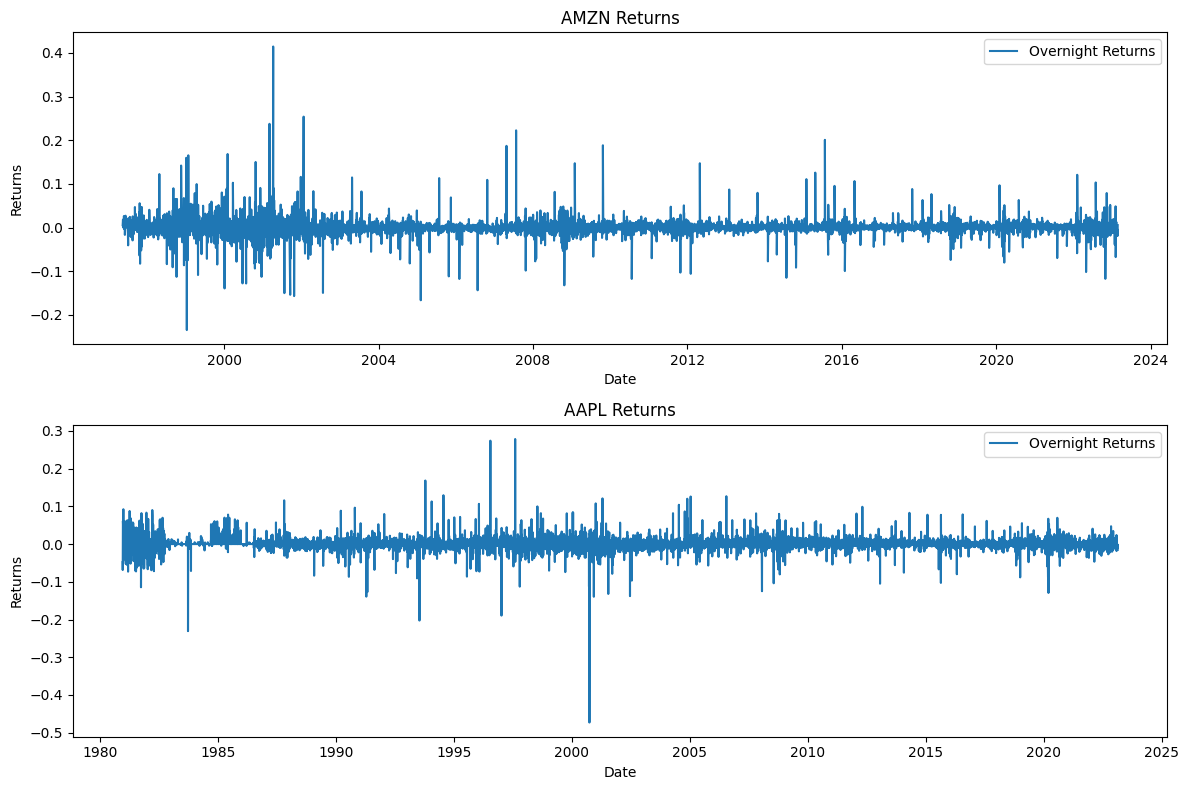

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# AMZN Daily and Overnight Returns
# axs[0].plot(amzn["Date"], amzn["intraday"], label="Intra Day Returns")
axs[0].plot(amzn["Date"], amzn["overnight"], label="Overnight Returns")
# axs[0].plot(amzn["Date"], amzn["overnightpremium"], label="Overnight Premium")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Returns")
axs[0].set_title("AMZN Returns")
axs[0].legend()

# AAPL Daily and Overnight Returns
# axs[1].plot(aapl["Date"], aapl["intraday"], label="Intra Day Returns")
axs[1].plot(aapl["Date"], aapl["overnight"], label="Overnight Returns")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Returns")
axs[1].set_title("AAPL Returns")
axs[1].legend()

plt.tight_layout()
plt.show()


In [9]:
amzn.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,overnight,intraday,24hr,overnightpremium
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN,-0.196578,NaN,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,0.005321,-0.121701,-0.192304,0.127022
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,0.018078,-0.029584,-0.105823,0.047662
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,0.012187,-0.054211,-0.017757,0.066398
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,0.000000,-0.127392,-0.054211,0.127392


In [10]:
min_overnight_row = aapl.loc[aapl['overnight'].idxmin()]
min_overnight_row

Date                2000-09-29
Open                  0.428409
High                  0.440758
Low                   0.385663
Close                 0.391362
Volume              7421640800
Dividends                  0.0
Stock Splits               0.0
overnight            -0.473131
intraday             -0.086475
24hr                  -0.42839
overnightpremium     -0.386656
Name: 5004, dtype: object

### Saw a drastic change in the graph so thought about it and searched the web 
#### As per CNN for the date 29 Sept 2000
One day after Apple (AAPL: Research, Estimates) warned that its fourth-quarter earnings and revenue would fall below expectations, investors decided it was no longer a core holding, and investors sliced its value in half. In late afternoon trading Friday, the stock was down $27.50 at $26, a 51 percent plunge. The market's reaction caused Apple to lose about $10 billion of market value in one day. Trading volume was more than 20 times Apple's daily average.

In [11]:
amz = amzn[['Date', 'overnight']].copy()
aap = aapl[['Date', 'overnight']].copy()


amz.rename(columns={'overnight': 'Amazon'}, inplace=True)
aap.rename(columns={'overnight': 'Apple'}, inplace=True)

amz.set_index('Date', inplace=True)
aap.set_index('Date', inplace=True)

amz_aapl = pd.merge(aap[["Apple"]], amz[["Amazon"]], left_index=True, right_index=True, how="left")
amz_aapl["Amazon"].fillna(0, inplace=True)
amz_aapl["Apple"].fillna(0, inplace=True)

amz_aapl.head()


,Apple,Amazon
Date,,
1980-12-12,0.000000,0.0
1980-12-15,-0.047823,0.0
1980-12-16,-0.068811,0.0
1980-12-17,0.024751,0.0
1980-12-18,0.028993,0.0


In [12]:
amz_aapl.columns

Index(['Apple', 'Amazon'], dtype='object')

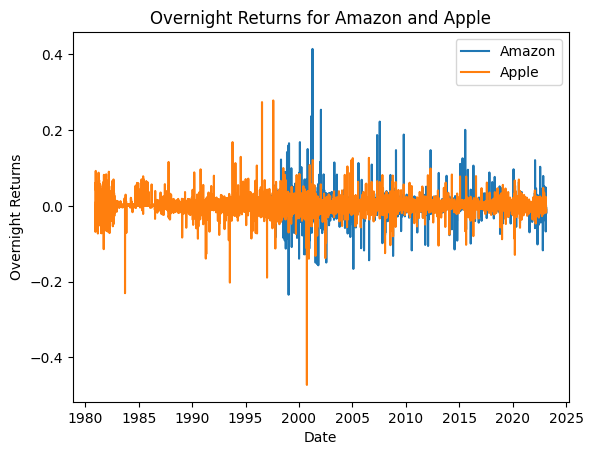

In [13]:
# Create a plot of the overnight returns for Amazon and Apple
plt.plot(amz_aapl.index, amz_aapl["Amazon"], label="Amazon")
plt.plot(amz_aapl.index, amz_aapl["Apple"], label="Apple")

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Overnight Returns")
plt.title("Overnight Returns for Amazon and Apple")
plt.legend()

# Show the plot
plt.show()

In [14]:
amz_aapl.to_csv('overnight_returns.csv')

## Assumption: Investment is $10k and for the time period of january 2023

In [15]:
Investment = 10000
amzn_investment= amzn_investment_overnight = amzn_investment_intraday = amzn_investment_24hr = Investment / 2
aapl_investment= aapl_investment_overnight = aapl_investment_intraday = aapl_investment_24hr = Investment / 2
start_date= '2023-01-01'
end_date = '2023-01-31'

Using dates because as per investopedia : Financial analysts typically consider the volatility of monthly returns when using the Sharpe ratio.

In [16]:
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

In [17]:
amzn_filtered = amzn[(amzn['Date'] >= start_date) & (amzn['Date'] <= end_date)]
amzn_filtered.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,overnight,intraday,24hr,overnightpremium
6451,2023-01-03,85.459999,86.959999,84.209999,85.820000,76706000,0.0,0.0,0.017381,0.004213,0.028152,0.013168
6452,2023-01-04,86.550003,86.980003,83.360001,85.139999,68885100,0.0,0.0,0.008506,-0.016291,0.012755,0.024797
6453,2023-01-05,85.330002,85.419998,83.070000,83.120003,67930800,0.0,0.0,0.002232,-0.025899,-0.014096,0.028131
6454,2023-01-06,83.029999,86.400002,81.430000,86.080002,83219100,0.0,0.0,-0.001083,0.036734,-0.026954,-0.037817
6455,2023-01-09,87.459999,89.480003,87.080002,87.360001,65266100,0.0,0.0,0.016032,-0.001143,0.053354,0.017175


In [18]:

amzn_filtered['overnight_strategy'] = ((amzn_filtered['Open'] - amzn_filtered['Close'].shift(1)) / amzn_filtered['Close'].shift(1))
amzn_filtered['overnight_PnL'] = amzn_investment_overnight * amzn_filtered['overnight_strategy']

amzn_filtered['intraday_strategy'] = ((amzn_filtered['Close'] - amzn_filtered['Open']) / amzn_filtered['Open'])
amzn_filtered['intraday_PnL'] = amzn_investment_intraday * amzn_filtered['intraday_strategy']

amzn_filtered['24hr_strategy'] = ((amzn_filtered['Open'] - amzn_filtered['Open'].shift(1)) / amzn_filtered['Open'].shift(1))
amzn_filtered['24hr_PnL'] = amzn_investment_24hr * amzn_filtered['24hr_strategy']

amzn_profit_overnight = amzn_filtered['overnight_PnL'].sum()
amzn_profit_intraday = amzn_filtered['intraday_PnL'].sum()
amzn_profit_24hr = amzn_filtered['24hr_PnL'].sum()

print('Total Profit or Loss by Overnight trading strategy : ${:.2f}'.format(amzn_profit_overnight))
print('Total Profit or Loss by Intraday trading strategy : ${:.2f}'.format(amzn_profit_intraday))
print('Total Profit or Loss by 24hr trading strategy : ${:.2f}'.format(amzn_profit_24hr))


Total Profit or Loss by Overnight trading strategy : $136.63
Total Profit or Loss by Intraday trading strategy : $843.76
Total Profit or Loss by 24hr trading strategy : $896.16


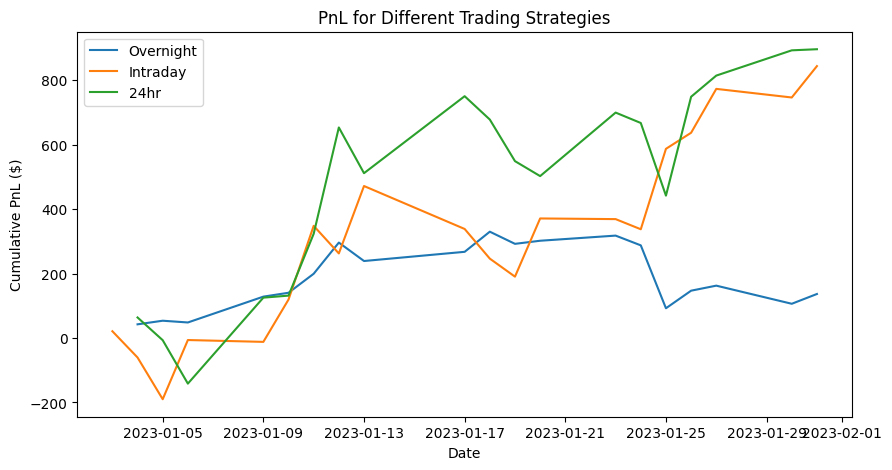

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(amzn_filtered['Date'], amzn_filtered['overnight_PnL'].cumsum(), label='Overnight')
ax.plot(amzn_filtered['Date'], amzn_filtered['intraday_PnL'].cumsum(), label='Intraday')
ax.plot(amzn_filtered['Date'], amzn_filtered['24hr_PnL'].cumsum(), label='24hr')

ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative PnL ($)')
ax.set_title('PnL for Different Trading Strategies')

plt.show()

In [20]:
aapl_filtered = aapl[(aapl['Date'] >= start_date) & (aapl['Date'] <= end_date)]

aapl_filtered['overnight_strategy'] = (aapl_filtered['Open'] - aapl_filtered['Close'].shift(1)) / aapl_filtered['Close'].shift(1)
aapl_filtered['overnight_PnL'] = aapl_investment_overnight * aapl_filtered['overnight_strategy']

aapl_filtered['intraday_strategy'] = (aapl_filtered['Close'] - aapl_filtered['Open']) / aapl_filtered['Open']
aapl_filtered['intraday_PnL'] = aapl_investment_intraday * aapl_filtered['intraday_strategy']

aapl_filtered['24hr_strategy'] = (aapl_filtered['Open'] - aapl_filtered['Open'].shift(1)) / aapl_filtered['Open'].shift(1)
aapl_filtered['24hr_PnL'] = aapl_investment_24hr * aapl_filtered['24hr_strategy']


aapl_profit_overnight = aapl_filtered['overnight_PnL'].sum()
aapl_profit_intraday = aapl_filtered['intraday_PnL'].sum()
aapl_profit_24hr = aapl_filtered['24hr_PnL'].sum()

print('Total Profit or Loss by Overnight trading strategy : ${:.2f}'.format(aapl_profit_overnight))
print('Total Profit or Loss by Intraday trading strategy : ${:.2f}'.format(aapl_profit_intraday))
print('Total Profit or Loss by 24hr trading strategy : ${:.2f}'.format(aapl_profit_24hr))


Total Profit or Loss by Overnight trading strategy : $54.01
Total Profit or Loss by Intraday trading strategy : $473.01
Total Profit or Loss by 24hr trading strategy : $468.17


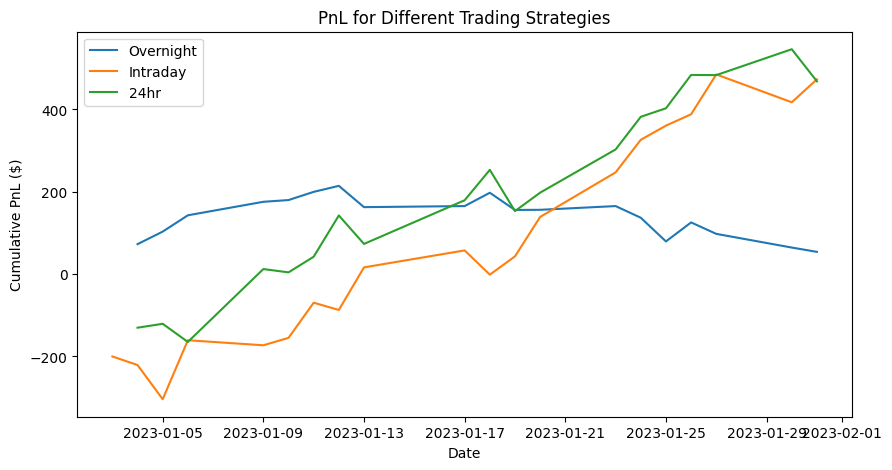

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(aapl_filtered['Date'], aapl_filtered['overnight_PnL'].cumsum(), label='Overnight')
ax.plot(aapl_filtered['Date'], aapl_filtered['intraday_PnL'].cumsum(), label='Intraday')
ax.plot(aapl_filtered['Date'], aapl_filtered['24hr_PnL'].cumsum(), label='24hr')

ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative PnL ($)')
ax.set_title('PnL for Different Trading Strategies')

plt.show()

### Note:
#### These are basic implementations of the strategies , an addition to this can be adding condition to sell only if situation is positive.
#### The overnight strategy is the one that deals with market changes after trading is closed 

# Sharpe Ratio Calculation

In [22]:
# assume risk-free rate is 2%
rf_rate = 0.00

In [25]:
amzn_overnight_returns = amzn_filtered['overnight_PnL'] / 10000
amzn_intraday_returns = amzn_filtered['intraday_PnL'] / 10000
amzn_hr24_returns = amzn_filtered['24hr_PnL'] / 10000

amzn_overnight_stddev = np.std(amzn_overnight_returns)
amzn_intraday_stddev = np.std(amzn_intraday_returns)
amzn_hr24_stddev = np.std(amzn_hr24_returns)

amzn_overnight_sharpe = (np.mean(amzn_overnight_returns) - rf_rate) / amzn_overnight_stddev
amzn_intraday_sharpe = (np.mean(amzn_intraday_returns) - rf_rate) / amzn_intraday_stddev
amzn_hr24_sharpe = (np.mean(amzn_hr24_returns) - rf_rate) / amzn_hr24_stddev
print("Sharpe ratio for Amazon Overnight Trading Strategy: {:.2f}".format(amzn_overnight_sharpe))
print("Sharpe ratio for Amazon Intraday Trading Strategy: {:.2f}".format(amzn_intraday_sharpe))
print("Sharpe ratio for Amazon 24hr Trading Strategy: {:.2f}".format(amzn_hr24_sharpe))

Sharpe ratio for Amazon Overnight Trading Strategy: 0.11
Sharpe ratio for Amazon Intraday Trading Strategy: 0.34
Sharpe ratio for Amazon 24hr Trading Strategy: 0.29


In [26]:

overnight_returns = aapl_filtered['overnight_PnL'] / 10000
intraday_returns = aapl_filtered['intraday_PnL'] / 10000
hr24_returns = aapl_filtered['24hr_PnL'] / 10000

overnight_stddev = np.std(overnight_returns)
intraday_stddev = np.std(intraday_returns)
hr24_stddev = np.std(hr24_returns)

overnight_sharpe = (np.mean(overnight_returns) - rf_rate) / overnight_stddev
intraday_sharpe = (np.mean(intraday_returns) - rf_rate) / intraday_stddev
hr24_sharpe = (np.mean(hr24_returns) - rf_rate) / hr24_stddev
print("Sharpe Ratio for Apple Overnight Trading Strategy: {:.2f}".format(overnight_sharpe))
print("Sharpe Ratio for Apple Intraday Trading Strategy: {:.2f}".format(intraday_sharpe))
print("Sharpe Ratio for Apple 24 Hour Trading Strategy: {:.2f}".format(hr24_sharpe))


Sharpe Ratio for Apple Overnight Trading Strategy: 0.08
Sharpe Ratio for Apple Intraday Trading Strategy: 0.29
Sharpe Ratio for Apple 24 Hour Trading Strategy: 0.31


Stocks like Amazon and Apple are highly traded and have a lot of news and events that can occur after the market closes. These events can impact the opening price the next day, making the overnight strategy less effective than the intraday or 24hr strategies. Consequently, the overnight strategy may suffer losses if there is a price gap between the previous day's close and the current day's open. In contrast, intraday and 24hr strategies pay more attention to price movement during the trading day and are less affected by news or events after hours.